In [62]:
#| echo: false
import pandas as pd
import plotly.io as pio


import plotly.express as px
regions = ["Seattle, WA", "United States", "San Francisco, CA"]

def grab_data(data_code, regions):
  args = {
      "filepath_or_buffer" : f"https://files.zillowstatic.com/research/public_csvs/{data_code}.csv",
      "index_col" : [0,1,2,3,4],
   }
  dat = pd.read_csv(**args)
  dat = dat.melt(ignore_index=False, var_name="date").reset_index()
  dat["date"] = pd.to_datetime(dat["date"])
  dat = dat[dat["RegionName"].isin(regions)]
  return dat
    
def plotly_code(data_code, title, regions): 
  dat = grab_data(data_code, regions)
  fig = px.line(dat, y="value", color="RegionName", x="date", title=title)
  fig.show();

## Seattle Housing Inventory
The following shows the total home inventory available in the Seattle Metro region over the last few years.

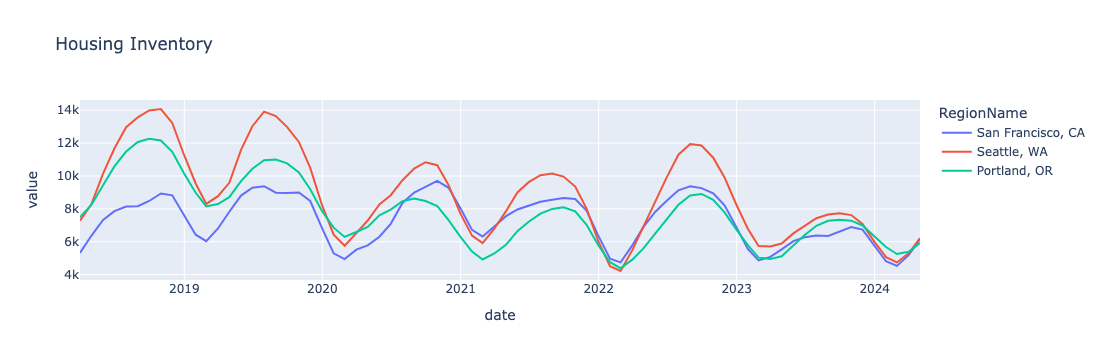

In [66]:
#| title: Seattle Inventory
#| echo: false
data_code = "invt_fs/Metro_invt_fs_uc_sfrcondo_sm_month"
labels = {
    data_code : "Total Inventory"
}
plotly_code(data_code, "Housing Inventory", ["Seattle, WA", "San Francisco, CA", "Portland, OR"] )


## Days on Market
The following shows the average days on market in the Seattle Metro region over the last few years.

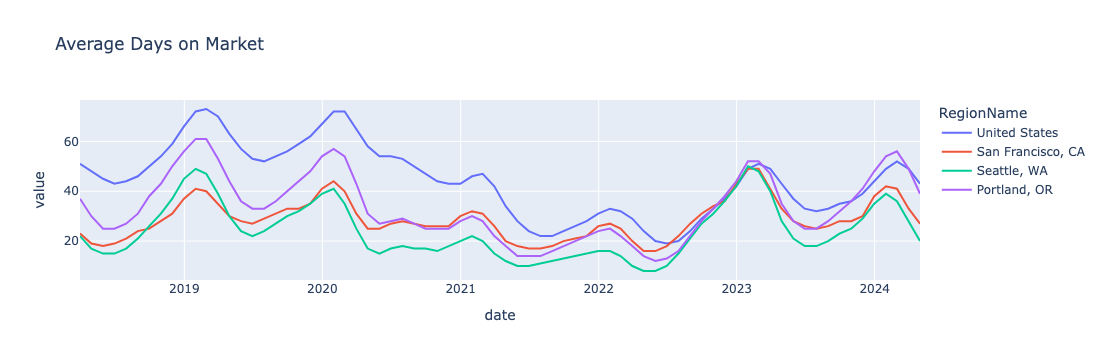

In [67]:
#| title: Seattle Days on Market 
#| echo: false
data_code = "mean_doz_pending/Metro_mean_doz_pending_uc_sfrcondo_sm_month"

plotly_code(data_code, "Average Days on Market", ["Seattle, WA", "San Francisco, CA", "Portland, OR", "United States"])